In [1]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
def load_images(source_dir):
    input_images = []
    output_labels = []

    channels = 1

    for image_path in glob.glob(source_dir + "/**/*.jpg", recursive=True):
        image_relative_path = image_path.replace(source_dir, '')
        relative_path_array = image_relative_path.split(os.path.sep)
        output_labels.append(relative_path_array[1])

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img, (64, 64))
        resized = resized.reshape(64, 64, channels)
        input_images.append(resized/255)

    return input_images, output_labels

In [2]:
print('Start loading process')

source_dir = "/kaggle/input/asl-dataset-research/asl/asl_alphabet_train/asl_alphabet_train"
input_images, output_labels = load_images(source_dir)

print("End loading process")

Start loading process
End loading process


# Plotting Images

5


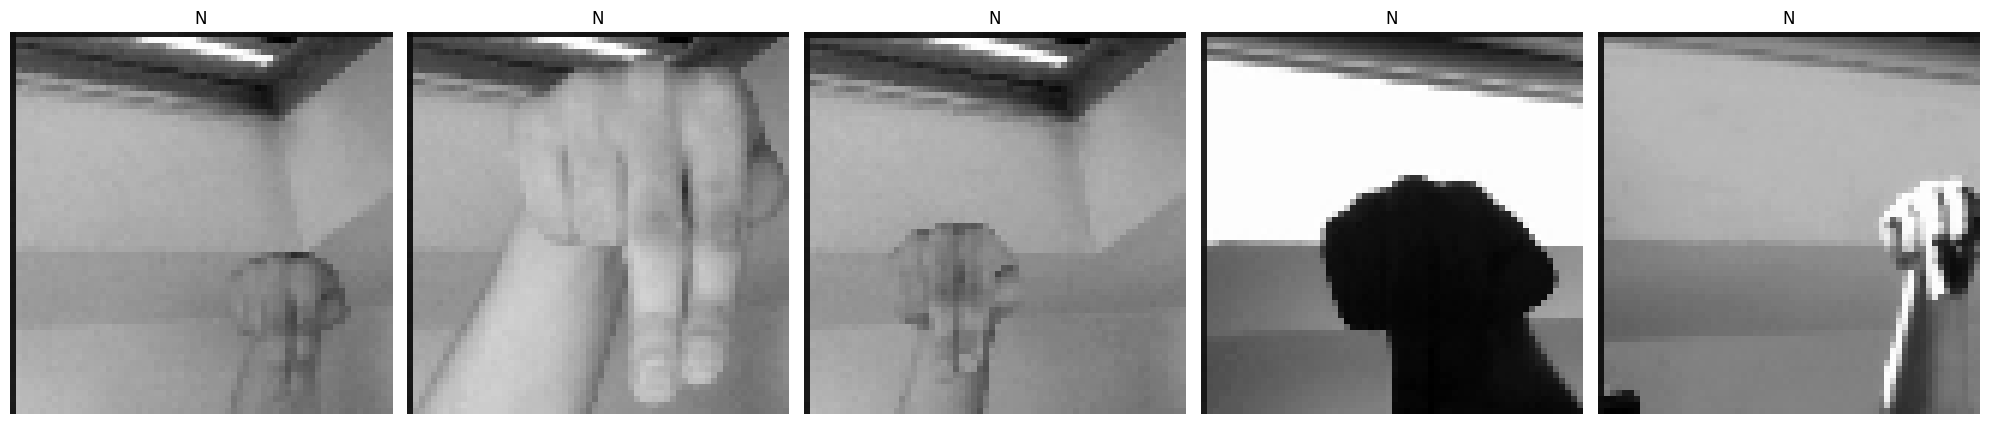

In [3]:
def plot_images(image_list, label_list, channels, rows=1, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(20,20))
    axes = axes.flatten()

    for image, label, ax in zip(image_list, label_list, axes):
        if channels == 1:
            image = np.squeeze(image)

        ax.imshow(image, cmap='gray')
        ax.set_title(label)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

print(len(input_images[:5]))

images_sample = [input_images[1], input_images[100], input_images[200], input_images[300], input_images[1000]]
labels_sample = [output_labels[1], output_labels[100], output_labels[200], output_labels[300], output_labels[1000]]

channels = 1
plot_images(images_sample, labels_sample, channels)

# One-Hot Encoded Labels

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
label_encoder.fit(output_labels)

labels_amount = len(label_encoder.classes_)

onehot_encoder = OneHotEncoder(sparse_output=False)

categorical_column = label_encoder.transform(output_labels)
integer_encoded = categorical_column.reshape(len(categorical_column),1)

onehot_encoder.fit(integer_encoded)
output_labels_values = onehot_encoder.transform(integer_encoded)

# Split

In [5]:
from sklearn.model_selection import train_test_split

images_train, images_test, labels_train, labels_test = train_test_split(input_images, output_labels_values, test_size=0.3, random_state=42)

print('Training set size : ', len(images_train))
print('Testing set size : ', len(images_test))
print('Labels set size : ', len(labels_train))
print('Labels testing set size : ', len(labels_test))

Training set size :  60900
Testing set size :  26100
Labels set size :  60900
Labels testing set size :  26100


In [6]:
import numpy as np
images_train_flat = np.array([image.flatten() for image in images_train])
images_test_flat = np.array([image.flatten() for image in images_test])
labels_train_flat = np.argmax(np.array(labels_train), axis=1)
labels_test_flat = np.argmax(np.array(labels_test), axis=1)

# Random Forest Model

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(images_train_flat, labels_train_flat)

rf_predictions = rf_model.predict(images_test_flat)

rf_accuracy = accuracy_score(labels_test_flat, rf_predictions)
rf_conf_matrix = confusion_matrix(labels_test_flat, rf_predictions)
#rf_precision = precision_score(labels_test_flat, rf_predictions)
rf_class = classification_report(labels_test_flat, rf_predictions)

print("Random Forest Classifier Accuracy :", rf_accuracy)
#print("Random Forest Classifier Precision : ", rf_precision)
print(rf_class)
print("Confusion Matrix:\n", rf_conf_matrix)

Random Forest Classifier Accuracy : 0.9913793103448276
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       920
           1       0.98      0.98      0.98       866
           2       0.99      0.99      0.99       951
           3       0.99      0.99      0.99       921
           4       0.98      0.97      0.98       898
           5       0.99      0.99      0.99       878
           6       1.00      0.99      0.99       853
           7       0.99      1.00      0.99       895
           8       0.99      1.00      0.99       883
           9       1.00      1.00      1.00       873
          10       1.00      0.99      0.99       972
          11       0.99      1.00      1.00       847
          12       1.00      0.99      0.99       900
          13       1.00      1.00      1.00       904
          14       0.99      1.00      0.99       886
          15       1.00      1.00      1.00       925
          16       1.00   

# Support Vector Machine

In [8]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svm_model = svm.SVC(kernel='linear')
svm_fitted_model = svm_model.fit(images_train_flat, labels_train_flat)
svm_predictions = svm_fitted_model.predict(images_test_flat)

print("SVM Accuracy:", accuracy_score(labels_test_flat, svm_predictions))
print()
print(classification_report(labels_test_flat, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(labels_test_flat, svm_predictions))

SVM Accuracy: 0.9586590038314177

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       920
           1       0.90      0.90      0.90       866
           2       0.97      0.96      0.96       951
           3       0.94      0.95      0.94       921
           4       0.91      0.91      0.91       898
           5       0.96      0.92      0.94       878
           6       0.96      0.95      0.96       853
           7       0.95      0.96      0.96       895
           8       0.95      0.98      0.97       883
           9       0.96      0.98      0.97       873
          10       0.98      0.97      0.97       972
          11       0.97      0.98      0.98       847
          12       0.96      0.95      0.95       900
          13       0.97      0.97      0.97       904
          14       0.96      0.96      0.96       886
          15       1.00      0.98      0.99       925
          16       0.99      1.00      0.99    